# Análisis mercado inmobiliario de la Ciudad de Buenos Aires - Properati

## Los atributos

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


## Objetivos
* Describir el dataset
* Identificar valores extraós y limpiar el dataset
* Encontrar los valores máximos y minimos de las diferentes categorias
* Identificar relaciones entre variables
* Responder preguntas de negocio
* Elaborar modelos de ML que me permitan clasificar el barrio al cual puede pertenecer un registro

In [1]:
# Importar bibliotecas en esta celda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Seteo de parametros de los gráficos
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
# cargá el dataset en esta celda
df = pd.read_csv('in/datos_properati.csv', parse_dates=["created_on"])

In [4]:
"""import pipeline
df = pipeline.main(df)"""

'import pipeline\ndf = pipeline.main(df)'

In [5]:
print(df.shape)
df.head(3)

(18979, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 18979 non-null datetime64[ns]
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: datetime64[ns](1), float64(10), ob

In [7]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,18979.000000,18979.000000,1.744500e+04,16586.000000,16876.000000,16037.000000,2756.000000,13517.000000,3.815000e+03,18979.000000
mean,-34.600838,-58.435161,2.963559e+05,142.784758,127.491171,2760.408525,11.040639,3.033661,4.884536e+03,7.981137
std,0.026372,0.040787,4.108344e+05,1731.936727,1524.167396,1940.153216,53.448795,1.778162,3.024617e+04,5.007441
min,-34.695717,-58.530822,5.043300e+03,0.000000,1.000000,0.958333,1.000000,1.000000,1.000000e+00,1.000000
25%,-34.619827,-58.464637,1.200000e+05,48.000000,43.000000,1984.126984,2.000000,2.000000,1.600000e+03,3.000000
50%,-34.601014,-58.434293,1.800000e+05,75.000000,67.000000,2545.454545,4.000000,3.000000,2.800000e+03,7.000000
75%,-34.582748,-58.401513,3.200000e+05,134.000000,117.000000,3162.790698,8.000000,4.000000,5.000000e+03,13.000000
max,-34.534315,-58.353227,1.350000e+07,184000.000000,150000.000000,142450.141026,904.000000,38.000000,1.843611e+06,15.000000


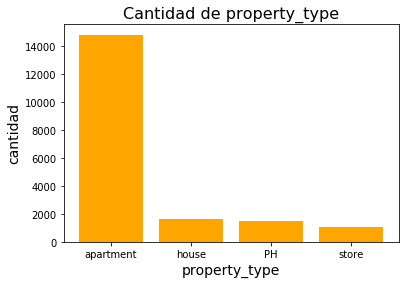

In [8]:
plt.ylabel('cantidad', fontsize=14)
plt.xlabel('property_type', fontsize=14)

plt.title('Cantidad de property_type', fontsize = 16)

grouped_property_type = pd.DataFrame(df.groupby('property_type')['property_type'].size().reset_index(name='total'))
grouped_property_type = grouped_property_type.sort_values(by='total', ascending = False)

x = grouped_property_type['property_type'].values
y = grouped_property_type['total'].values

plt.bar(x,y, color='orange')

plt.show();

## Categorías relevantes:
    * property_type
    * barrio
    * operation

In [9]:
grouped_property_type

,property_type,total
1,apartment,14807
2,house,1618
0,PH,1463
3,store,1091


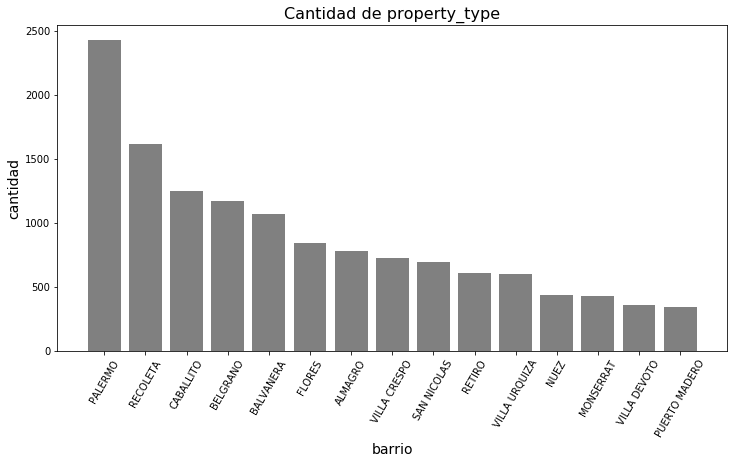

In [10]:
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['xtick.labelsize'] = 10
plt.ylabel('cantidad', fontsize=14)
plt.title('Cantidad de property_type', fontsize = 16)
plt.xlabel('barrio', fontsize=14)
plt.xticks(rotation=60)

grouped_barrio = pd.DataFrame(df.groupby('barrio')['barrio'].size().reset_index(name='total'))
grouped_barrio = grouped_barrio.sort_values(by='total', ascending = False).reset_index(drop=True)

x = grouped_barrio.head(15)['barrio'].values
y = grouped_barrio.head(15)['total'].values

plt.bar(x,y, color='grey')

plt.show();

In [11]:
grouped_barrio

,barrio,total
0,PALERMO,2424
1,RECOLETA,1615
2,CABALLITO,1251
3,BELGRANO,1174
4,BALVANERA,1068
5,FLORES,841
6,ALMAGRO,781
7,VILLA CRESPO,726
8,SAN NICOLAS,694
9,RETIRO,605


Para no entorpecer el análisis, voy a eliminar aquellas instancias que se encuentren vacías en los campos:
* price_aprox_usd
* price_usd_per_m2
* surface_total_in_m2
* surface_covered_in_m2

Por otro lado el campo rooms, voy a completarlo siguiendo la siguiente estrategia:
* Voy a asignarle el promedio de rooms del dataset

In [12]:
df_no_nan = df.fillna('')

In [13]:
#Control de valores que me tienen que quedar despues de borrar los vacíos en las columnas mencionadas
len(df)-len(df_no_nan[(df_no_nan['price_aprox_usd']== '') | (df_no_nan['price_usd_per_m2']== '') | (df_no_nan['surface_covered_in_m2']== '')| (df_no_nan['surface_total_in_m2']== '')])

15416

In [14]:
print(df.shape)
df = df.dropna(axis = 0, subset=['price_aprox_usd','price_usd_per_m2','surface_covered_in_m2','surface_total_in_m2'])

rooms_mean = {'rooms': df.rooms.mean()}
df = df.fillna(value=rooms_mean).reset_index(drop=True)
print(df.shape)

(18979, 17)
(15416, 17)


## Revisión de features

In [15]:
df.groupby('operation')['operation'].count()

operation
sell    15416
Name: operation, dtype: int64

In [16]:
df['Zona'] = df.place_with_parent_names.apply( lambda x : x.split('|')[2])

In [17]:
df.groupby('Zona')['Zona'].count()

Zona
Bs.As. G.B.A. Zona Norte       15
Bs.As. G.B.A. Zona Oeste        7
Bs.As. G.B.A. Zona Sur          1
Capital Federal             15393
Name: Zona, dtype: int64

Como la feature **operation** solo tiene un valor en todos sus registros, voy a eliminarla porque ya se que todos los registros corresponden a *sell*

Por otro lado, voy a desestimar las features *place_with_parent_names* porque su desagregación (Pais|Zona|Barrio) no la voy a utilizar, como se que el pais es Argentina, la provincia Buenos Aires, solo extraigo la Zona. 

La feature **comuna** no me explica mucho en el README, por lo que no voy a considerarla para este análisis.

Las features **lat-lon, lat y lon** no las voy a considerar en mi anaálisis.

Las features *created_on* y *properati_url* no la voy a considerar, ya que no me interesa en este estudio saber este dato.

La feature **floor** y **expenses** la voy a desestimar tambien ya que mas del 80% de sus valores están incompletos



In [18]:
#Hago un print statment para verificar estar seguro que el dataset solo sufrió las mejoras que yo quiero.
print(df.shape)
df = df.drop(labels=['created_on','operation','place_with_parent_names',
                     'properati_url','comuna','lat-lon','lat','lon', 'floor', 'expenses'], axis=1)
print(df.shape)

(15416, 18)
(15416, 8)


## Control de registros

Antes de comenzar voy a verificar que la superficie cubierta no sea mayor que la superficie total (ya que sería una inconcistencia).

En caso de encontrar una inconsistencia voy a asumir que el usuario cargo mal el dato en el formulario, y voy intercambiar ambos valores.

In [19]:
wrong_surface = df[df['surface_covered_in_m2'] > df['surface_total_in_m2']]

In [20]:
print('Existen {} propiedades con esta inconsistencia'.format(len(wrong_surface)))

Existen 117 propiedades con esta inconsistencia


In [21]:
df.at[wrong_surface.index, 'surface_total_in_m2'] = wrong_surface.surface_covered_in_m2
df.at[wrong_surface.index, 'surface_covered_in_m2'] = wrong_surface.surface_total_in_m2

In [22]:
#Hago un print statment para validar que el cambio se efectúo
df[df['surface_covered_in_m2'] > df['surface_total_in_m2']]

,property_type,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,Zona


## Outliers

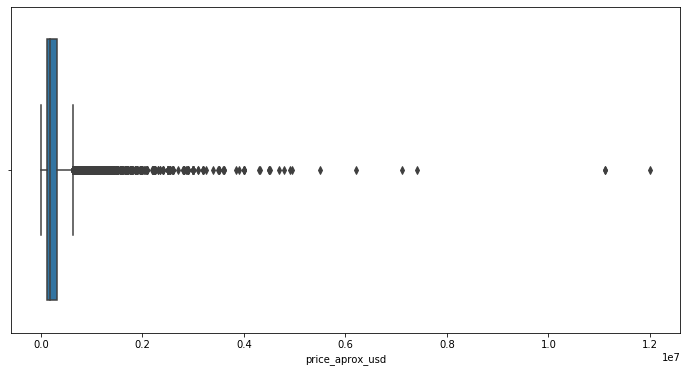

In [23]:
sns.boxplot(df.price_aprox_usd)

Voy a limpiar aquellos valores de la feature price_aprox_usd que esten por encima del percentil 90, ya que como se en el boxplot de arriba, son pocos los registros que se encuentran en ese rango de valores y pordrían llegar a afectar el posterior análisis.

In [24]:
print(len(df))
df = df[df['price_aprox_usd'] < df.price_aprox_usd.quantile(0.95)].reset_index(drop=True)
print(len(df))

15416
14644


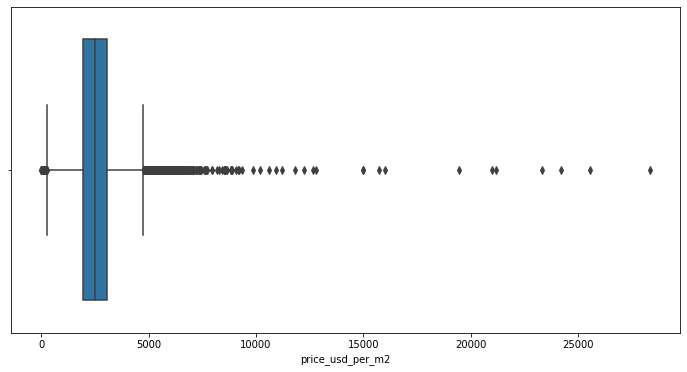

In [25]:
sns.boxplot(df.price_usd_per_m2)

In [26]:
print(len(df))
df = df[df['price_usd_per_m2'] < df.price_usd_per_m2.quantile(0.95)].sort_values(by='price_usd_per_m2', ascending = False)
print(len(df))

14644
13911


##  Barrios

### Barrios con más edificios y barrios con más casas

Al saber qué barrios son los que tienen más cantidad publicadas y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso voy a calcular los porcentajes de cada tipo de propiedad según el barrio.

In [27]:
total_propiedades = df.groupby('barrio')['property_type'].count()

In [28]:
porcentaje_casas_ph = df[df.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df[df.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [29]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("\nBarrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    1.000000
RECOLETA         0.968360
BELGRANO         0.916364
PALERMO          0.910559
RETIRO           0.907731
Name: property_type, dtype: float64

Barrios con mayor porcentaje de casas y phs: 
  barrio
PUERTO MADERO             NaN
VILLA RIACHUELO      0.666667
VERSALLES            0.660714
MATADEROS            0.612069
PARQUE AVELLANEDA    0.582418
Name: property_type, dtype: float64


### Barrios más caros y más baratos

**Barrio con price_usd_per_m2 mas alto**

In [30]:
df_barrio_filter = df.groupby(by=['barrio'])['price_usd_per_m2'].mean().reset_index(name='price_usd_per_m2').sort_values(by='price_usd_per_m2', ascending = False).reset_index(drop=True)
df_barrio_filter.head(5)

,barrio,price_usd_per_m2
0,PUERTO MADERO,3729.741830
1,PALERMO,3124.855689
2,RECOLETA,3016.923801
3,BELGRANO,2966.872027
4,RETIRO,2923.357237


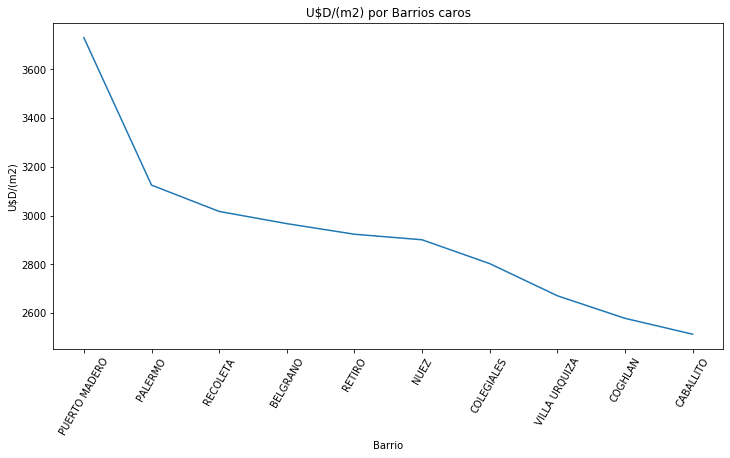

In [31]:
plt.xlabel('Barrio')
plt.ylabel('U$D/(m2)')
plt.title('U$D/(m2) por Barrios caros')

x_barrio_filter = df_barrio_filter.head(10)['barrio']
y_barrio_filter = df_barrio_filter.head(10)['price_usd_per_m2']

plt.xticks(rotation=60)
plt.plot(x_barrio_filter, y_barrio_filter)
plt.show();

**Barrio con price_usd_per_m2 mas bajo**

In [32]:
df_barrio_filter.tail(10)

,barrio,price_usd_per_m2
38,VERSALLES,1765.312584
39,FLORESTA,1762.921383
40,PARQUE PATRICIOS,1750.314633
41,BOCA,1714.492008
42,MATADEROS,1506.859641
43,NUEVA POMPEYA,1441.885895
44,PARQUE AVELLANEDA,1399.883598
45,VILLA RIACHUELO,1318.280365
46,VILLA LUGANO,1192.267249
47,VILLA SOLDATI,920.825753


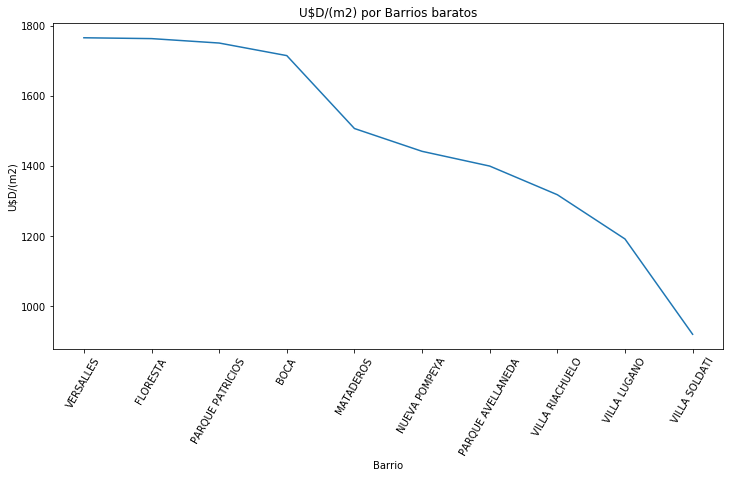

In [33]:
plt.xlabel('Barrio')
plt.ylabel('U$D/(m2)')
plt.title('U$D/(m2) por Barrios baratos')

x_barrio_filter = df_barrio_filter.tail(10)['barrio']
y_barrio_filter = df_barrio_filter.tail(10)['price_usd_per_m2']

plt.xticks(rotation=60)
plt.plot(x_barrio_filter, y_barrio_filter)
plt.show();

## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [34]:
barrios_caros = df_barrio_filter.head(10)
barrios_baratos = df_barrio_filter.tail(10)

In [35]:
barrios_caros

,barrio,price_usd_per_m2
0,PUERTO MADERO,3729.741830
1,PALERMO,3124.855689
2,RECOLETA,3016.923801
3,BELGRANO,2966.872027
4,RETIRO,2923.357237
5,NUEZ,2900.637334
6,COLEGIALES,2802.811419
7,VILLA URQUIZA,2670.943622
8,COGHLAN,2578.367407
9,CABALLITO,2513.239232


In [36]:
x_price_usd_per_m2_barrio_caro = df[(df['barrio'] == 'PUERTO MADERO') | (df['barrio'] == 'PALERMO')| (df['barrio'] == 'RETIRO')|
   (df['barrio'] == 'RECOLETA')| (df['barrio'] == 'BELGRANO')| (df['barrio'] == 'NUEZ')| (df['barrio'] == 'COLEGIALES')
                                    | (df['barrio'] == 'VILLA URQUIZA')| (df['barrio'] == 'COGHLAN')| (df['barrio'] == 'VILLA CRESPO')].price_usd_per_m2

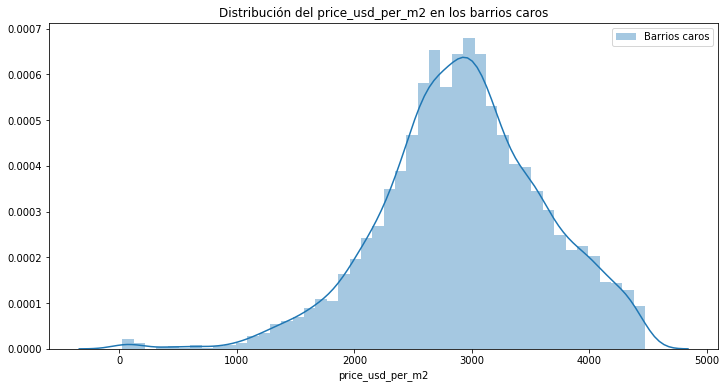

In [37]:
plt.title('Distribución del price_usd_per_m2 en los barrios caros')
sns.distplot(x_price_usd_per_m2_barrio_caro, label="Barrios caros")
plt.legend();

In [38]:
barrios_baratos

,barrio,price_usd_per_m2
38,VERSALLES,1765.312584
39,FLORESTA,1762.921383
40,PARQUE PATRICIOS,1750.314633
41,BOCA,1714.492008
42,MATADEROS,1506.859641
43,NUEVA POMPEYA,1441.885895
44,PARQUE AVELLANEDA,1399.883598
45,VILLA RIACHUELO,1318.280365
46,VILLA LUGANO,1192.267249
47,VILLA SOLDATI,920.825753


In [39]:
x_price_usd_per_m2_barrio_barato = df[(df['barrio'] == 'VELEZ SARSFIELD') | (df['barrio'] == 'VERSALLES')| (df['barrio'] == 'PARQUE PATRICIOS')|
   (df['barrio'] == 'BOCA')| (df['barrio'] == 'NUEVA POMPEYA')| (df['barrio'] == 'MATADEROS')| (df['barrio'] == 'PARQUE AVELLANEDA')
                                    | (df['barrio'] == 'VILLA RIACHUELO')| (df['barrio'] == 'VILLA LUGANO')| (df['barrio'] == 'VILLA SOLDATI')].price_usd_per_m2

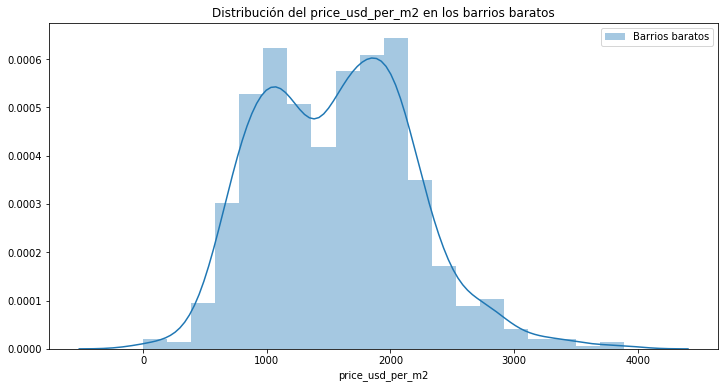

In [40]:
plt.title('Distribución del price_usd_per_m2 en los barrios baratos')
sns.distplot(x_price_usd_per_m2_barrio_barato, label="Barrios baratos" )
plt.legend();

## Conclusiones

1. En lo contrario de lo que se podría pensar, la cantidad de m2 cubiertos o totales, no tiene una relación directa con el precio de las propiedades, es mas, la propiedad mas valiosa es una casa de 750 m2 valuada en 12.000.000 USD.


2. La variable que mas impacto tiene sobre el precio de la vivienda es el barrio (por ejemplo: Palermo, puerto madero recoleta, son zonas que si bien sus departamentos o casa no son los mas grándes o tienen los mayores m2 (cubiertos o totales), esos barrios hacen que sean propiedades valiosas.


3. La distribución de precios en los barrios caros o báratos no se debe a outliers, sino más bien a que todas las propiedades de la zona tienen valores aproximados entre sí (tanto en los barrios baratos como en los barrios caros)


4. Se pudo detectar varias inconsistencias en los datos, como que propiedades tengan mas m2 cubiertos que m2 totales o que los apartments tengan diferentes valores entre superficies cubiertas y cuperficies totales




### Preguntas extra

1. Barrio que tiene la propiedad mas cara
2. Barrio que tiene el m2 mas caro (surface_total_in_m2)
3. Barrio que contenga la mayor cantidad de stores
4. El promedio de habitaciones que tienen los apartment el barrio mas popular del dataset


In [41]:
print('1. El barrio que tiene la propiedad mas cara')
df.sort_values(by='price_aprox_usd', ascending = False).head(1)['barrio']


1. El barrio que tiene la propiedad mas cara


11030    VILLA DEVOTO
Name: barrio, dtype: object

In [42]:
print('2. Barrio que tiene el m2 mas caro')
df.sort_values(by='surface_total_in_m2', ascending = False).head(1)['barrio']

2. Barrio que tiene el m2 mas caro


8368    PARQUE CHACABUCO
Name: barrio, dtype: object

In [43]:
df_store = pd.DataFrame(df[df['property_type'] =='store'].groupby(by=['barrio'])['barrio'].size().reset_index(name='total'))
df_store = df_store.sort_values(by='total', ascending = False).reset_index(drop=True)

In [44]:
print('Barrio que contenga la mayor cantidad de stores')
df_store.loc[0,'barrio']

Barrio que contenga la mayor cantidad de stores


'SAN NICOLAS'

In [45]:
#El promedio de habitaciones que tienen los apartment el barrio mas popular del dataset
#El barrio mas popular dle dataset lo vimos mas arriba

df_apartment = df[(df['property_type']=='apartment') & (df['barrio']=='PALERMO')]
df_apartment.rooms.mean()

2.8040365881845046

## ML

Voy a mostrar como funcionan dos modelos de clasificacion y voy a terminar exportando el que mejor rendimiento tenga.

**Feature a predecir:** barrio

**Features utilizadas:** 'price_aprox_usd', 'surface_covered_in_m2', 'rooms' y 'label_property_type'

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Voy a crear un nuevo target llamado "tipo_de_barrio" que voy a utilizar para hacer predicciones.
Va a ser una division entre 3 tipos de barrio dependiendo de su posición en la columna'price_usd_per_m2':
* Barrio caro
* Barrio medio
* Barrio barato

In [47]:
ml_barrio_caro = list(df_barrio_filter[:15].barrio)
ml_barrio_medio = list(df_barrio_filter[15:31].barrio)
ml_barrio_barato = list(df_barrio_filter[31:].barrio)

In [48]:
df = df.reset_index(drop=True)
for r in range(len(df)):
    
    df.loc[r,'tipo_de_barrio'] = 1 if df.loc[r,'barrio'] in ml_barrio_caro else 2 if df.loc[r,'barrio'] in ml_barrio_medio else 3
    
    if df.loc[r,'property_type'] =='apartment':
        df.loc[r,'label_property_type'] = 0 
    
    elif df.loc[r,'property_type'] =='PH':
        df.loc[r,'label_property_type'] = 1
    
    elif df.loc[r,'property_type'] =='house':
        df.loc[r,'label_property_type'] = 2
        
    else:
        df.loc[r,'label_property_type'] = 3
        
    
    

In [49]:
df.head()

,property_type,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,barrio,Zona,tipo_de_barrio,label_property_type
0,apartment,340000.0,76.0,67.0,4473.684211,3.000000,NUEZ,Capital Federal,1.0,0.0
1,apartment,340000.0,76.0,71.0,4473.684211,3.035078,PALERMO,Capital Federal,1.0,0.0
2,apartment,295000.0,66.0,66.0,4469.696970,2.000000,BELGRANO,Capital Federal,1.0,0.0
3,apartment,210000.0,47.0,36.0,4468.085106,1.000000,PALERMO,Capital Federal,1.0,0.0
4,apartment,375000.0,84.0,76.0,4464.285714,3.000000,RECOLETA,Capital Federal,1.0,0.0


In [50]:
X = df.drop(labels=['property_type','barrio','surface_total_in_m2','price_usd_per_m2','Zona','tipo_de_barrio'], axis=1).reset_index(drop= True)
y = df['tipo_de_barrio'].reset_index(drop= True)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.25)

## KNN

In [51]:
best_score = 0
best_params = []
scores_plot = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    
    scores_plot.append({'Neighbors': n,
                       'score':score})
    
    if score > best_score:
        
        best_score=score
        best_params = knn.get_params
    else:
        pass

In [52]:
print('El modelo KNN obtiene un Accuracy de {} cuando K es igual a {}'.format(round(best_score,3),best_params().get('n_neighbors')))

El modelo KNN obtiene un Accuracy de 0.635 cuando K es igual a 10


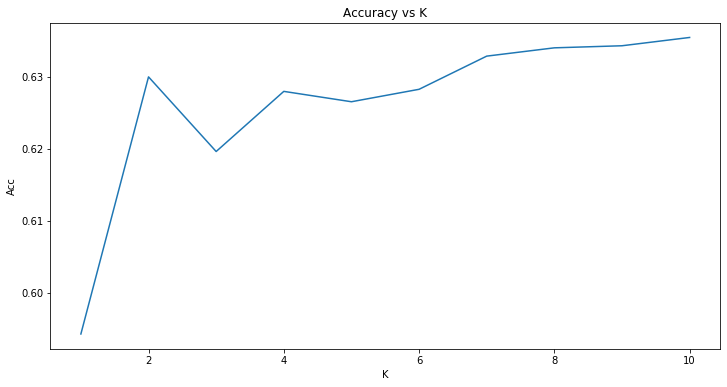

In [53]:
plt.xlabel('K')
plt.ylabel('Acc')
plt.title('Accuracy vs K')
plt.plot(pd.DataFrame(scores_plot).Neighbors, pd.DataFrame(scores_plot).score);

In [54]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1729  242   12]
 [ 610  432   39]
 [ 182  183   49]]
              precision    recall  f1-score   support

         1.0       0.69      0.87      0.77      1983
         2.0       0.50      0.40      0.45      1081
         3.0       0.49      0.12      0.19       414

    accuracy                           0.64      3478
   macro avg       0.56      0.46      0.47      3478
weighted avg       0.61      0.64      0.60      3478



## Como leo este resultado?

Para el tipo_de_barrio = 1, este modelo tiene la precision más alta vs el resto de los modelos. Es decir, que es bueno detectando cuando los dptos que corresponden a los barrios, caros, no así a los otros valores de la varible a predecir

## Predicción de prueba

In [55]:
df.loc[392]

property_type                  apartment
price_aprox_usd                   250000
surface_total_in_m2                   62
surface_covered_in_m2                 46
price_usd_per_m2                 4032.26
rooms                                  1
barrio                          RECOLETA
Zona                     Capital Federal
tipo_de_barrio                         1
label_property_type                    0
Name: 392, dtype: object

In [56]:
knn_price_aprox_usd = 250000
knn_surface_covered_in_m2 = 46
knn_rooms = 1
knn_label_property_type = 0


y_pred = knn.predict([[knn_price_aprox_usd,
                       knn_surface_covered_in_m2,
                       knn_rooms,
                       knn_label_property_type]])
print('Según los datos ingresados el barrio al cual corresponde es el tipo {}'.format(y_pred[0]))

Según los datos ingresados el barrio al cual corresponde es el tipo 1.0
